# Gradient Descent Tutorial
**In this tutorial, you are going to estimate a linear filter using gradient descent.**

There are many gradient descent routines both in matlab and in python.  The goal of this tutorial is to:

1. Realize how simple gradient descent can be
2. Obtain a visual schema on how it works on an error surface
3. Understand its relationship to regularization techniques

To do this, we'll simulate some data, and an artificial response to that data. Then we'll fit several models that attempt to uncover the relationship between the input / response data we've created.

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

## Generate a toy model: a 2d stimulus (2 pixels) and a simple filter

Text(0, 0.5, 'Response')

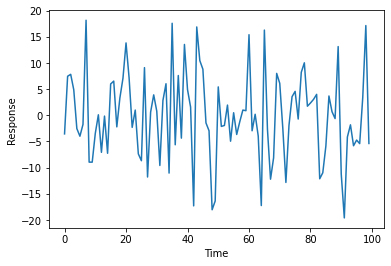

In [3]:
# Generate a two dimensional stimulus (e.g two pixels) with correlations and 100 samples (e.g. points in time)
# First pixel data
nsamp = 100
x1 = np.random.randn(1, nsamp)

# Second pixel that is correlated with the first
x2 = .4 * x1 + .6 * np.random.randn(1, nsamp)

# Concatinate into a stimulus matrix - here rows are dimensions and columns are time points.
x = np.vstack([x1, x2])

## Generate a filter and the corresponding one dimensional response 
# Set weights on each channel
h = np.array([5, 7]).reshape([2, 1])

# Make response of system - this is the output of our toy neuron
y = np.dot(x.T, h)

# Plot it as a time series
fig, ax = plt.subplots()
ax.plot(y)
plt.xlabel('Time')
plt.ylabel('Response')


## The Error Surface.

In [4]:
# We are going to pretend we don't know h and make a search for h values by settting up 
# a range of potential values for h1 and h2

h1, h2 = np.meshgrid(np.arange(-1, 10, .2), np.arange(-1, 10, .2))
hs = np.vstack([h1.ravel(), h2.ravel()])

# get responses from each set of weights
ys = np.dot(x.T, hs)

# calculate error between the response, y, and each of the possible responses, ys.  
err = np.sum((y - ys) ** 2, 0)

# reshape for plotting
err = err.reshape(h1.shape)

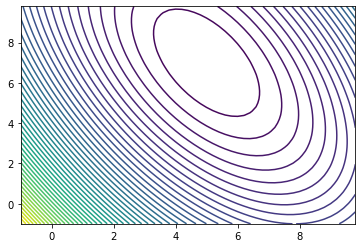

In [5]:
## plot contour of error surface. Note the shape of the surface is angled
# because the two variable are correlated.
fig, ax = plt.subplots()
ax.contour(h1, h2, err, 50)


## Problem 1. The gradient descent solution.
* Plot the actual solution as a large cross on the contour plot
* Print the value of the error surface at this solution?

Minimum Error: 7.183728322214112e-28
Error at (5,7): 7.183728322214112e-28


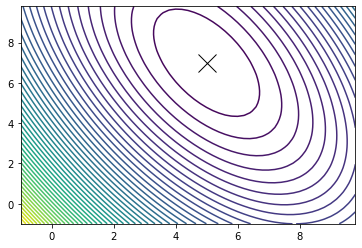

In [6]:
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err, 50)
ax.plot(h[0], h[1], 'kx', ms=18)

# The error is at a minimum at that value and since we did not add noise it is very close to zero.
print('Minimum Error:', err.min())
print('Error at (5,7):', err[(np.abs(h1-5.0)<1e-3)&(np.abs(h2-7.0)<1e-3)][0])
## SOLUTION END


# Problem 2. Gradient descent with more noise.
 Next we'll decrease the SNR of our response and see how this changes the solution found by the model.
 
* Generate a new response (call it `yr`, for "y real") that includes noise (SNR ~1). 
* Repeat some of the code above to obtain a new error surface as you would with real data.
* Plot this on a new figure and compare to the figure above.
* Calculate the minimum of this error and compare to the minimum of the noise free error surface.
* What happens to the error surface if you only have 10 data points (and noise)? 
* Calculate the surface / solution for this condition plot it in on a third plot.

In [7]:
## SOLUTION BEGIN

# The new response:
SNR = 1
yr = y + (np.std(y) / np.sqrt(SNR)) * np.random.randn(1, nsamp).T

# calculate error between the response and each of the possible responses  
err_real = np.sum((yr - ys) ** 2, 0)

# reshape for plotting
err_real = err_real.reshape(h1.shape)
## SOLUTION END

Minimum Error: 5444.215931422354
Error at (5,7): 5471.426077176154


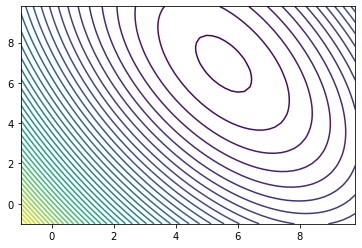

In [8]:
# Plot the contour / solution that you found:
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real, 50)

# The error is now stricly positive and not at h=(5,7).
print('Minimum Error:', err_real.min())
print('Error at (5,7):', err_real[(np.abs(h1-5.0)<1e-3)&(np.abs(h2-7.0)<1e-3)][0])
## SOLUTION END

In [9]:
# Now with fewer data points 
## SOLUTION BEGIN
nsampsmall = 10
xsmall = x[:, :nsampsmall]
yrsmall = yr[:nsampsmall, :]

# calculate error between the response and each of the possible responses  
err_real_small = np.sum((yrsmall - ys[:nsampsmall, :]) ** 2, 0)

# reshape for plotting
err_real_small = err_real_small.reshape(h1.shape)
## SOLUTION END

Minimum Error: 388.8441473587579
Error at (5,7): 677.5549778854273


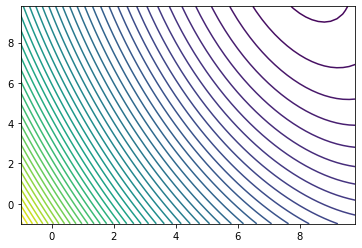

In [10]:
# Plot the result
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real_small, 50)

# The error is now stricly positive and not at h=(5,7).
print('Minimum Error:', err_real_small.min())
print('Error at (5,7):', err_real_small[(np.abs(h1-5.0)<1e-3)&(np.abs(h2-7.0)<1e-3)][0])
## SOLUTION END

We notice that the error surfaces do not become noisy but that the minimum moves either
when we add noise or when we reduce the number of points.
The minimum value in the noisy situation is also a postive, non-zero number.  This minimum is 
not found at the actual values of the linear filter.

# Problem 3. The analytical solution
Next we'll solve for the MSE solution using an analytical solution that doesn't depend on gradient descent.

* Solve for the Least MSE solution using the analytical solution (calculate the cross and auto correlation and take ratio).
> Note: in numpy: matrix multipy is `np.dot()` and matrix inverse is `np.linalg.inv()`
* Plot this solution as well as the correct solutions on your contour plots of figures 2 and 3.  

In [11]:
# Solve for the analytic solution to model weights
## SOLUTION BEGIN
cross_xy = np.dot(x, yr) / nsamp
auto_xx = np.dot(x, x.T) / nsamp
hpred = np.dot(np.linalg.inv(auto_xx), cross_xy)
## SOLUTION END

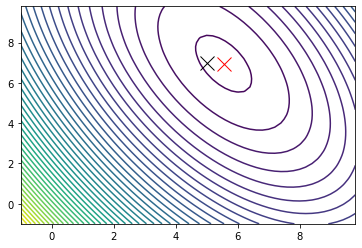

In [12]:
# Plot solution on contour
## SOLUTION BEGIN
fig, ax = plt.subplots()

ax.contour(h1, h2, err_real, 50)
ax.plot(hpred[0], hpred[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
## SOLUTION END

In [13]:
# Repeat for the subset of data points
## SOLUTION BEGIN
cross_xy_small = np.dot(xsmall, yrsmall) / nsampsmall
auto_xx_small = np.dot(xsmall, xsmall.T) / nsampsmall
hpred_small = np.dot(np.linalg.inv(auto_xx_small), cross_xy_small)  
## SOLUTION END

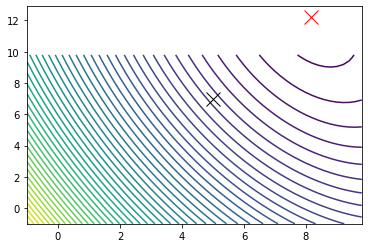

In [14]:
# plot solution on contour
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real_small, 50)
ax.plot(hpred_small[0], hpred_small[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
## SOLUTION END

# Problem 4. Comparing gradient descent with the MSE solution.
Now we're going to solve using gradient descent to show that you get the same answer as the MSE solution.

You are going to solve it using the x and yr data. Use the
analytical solution to calculate the error gradient.  Fill in the missing code and
print out the final solution. Stop the descent when error is less than
the noise power.

In [15]:
# set a step size and a fixed number of maximum steps
nsteps = 500   # This is a maximum number of steps
vary = np.var(yr)
hscale = 10    # This is a guess on the variance of the h parameters
stepsize = hscale / vary # This is to get stepsizes with the correct units.

In [16]:
# initialize hhat at origin and allocate space
hhat = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhat during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
# NOTE we are always going to the end of the loop for display purposes

totstep = -1
for ii in range(nsteps):
    
    # Write  code that calculates the gradient at the current hhat, updates the value of hhat and
    # calculates the mean square error  at the new value (variables mserr)
## SOLUTION BEGIN
    # calculate the gradient at hhat
    preds = np.dot(x.T, hhat[:,ii])
    err = preds - yr.squeeze()
    grad = np.dot(x, err) / nsamp
    
    # update hhat using stepsize and gradient
    hhat[:, ii + 1] = hhat[:, ii] - stepsize * grad
    
    # calculate mean square error
    mserr = np.mean((np.dot(x.T, hhat[:, ii+1]) - yr.squeeze()) ** 2)
## SOLUTION END
    
    # set stopping condition when error is below noise power.
    if mserr < (vary / (SNR + 1)):   # Find the first time the error is below the estimate of the noise
        if totstep == -1:
            totstep = ii+1

if totstep == -1:    
    totstep = ii+1

msg = 'Gradient solution of h = [{:.2f}, {:.2f}] reached after {} steps\n'.format(hhat[0, totstep], hhat[1, totstep], totstep)
print(msg)


Gradient solution of h = [4.48, 2.98] reached after 12 steps



# Problem 5. Plotting the gradient descent path.
Next we'll plot the gradient descent path on our contour plots in of figure 2. This will show us how the model converged on its solution.

* Plot the gradient descent path on the countour plot from figure 2
* Comment on why early stopping could give you a more general (non-overfit) solution.  

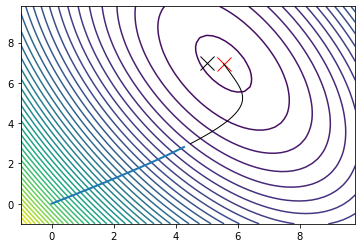

In [17]:
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real, 50)
ax.plot(hpred[0], hpred[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
ax.plot(hhat[0, :totstep], hhat[1, :totstep], lw=2)
ax.plot(hhat[0, totstep:], hhat[1, totstep:], 'k', lw=1)
## SOLUTION END

# Problem 6. Comparing gradient descent and MSE with fewer datapoints

Repeat the calculations of Problem 4 and 5 with figure 3 (the one with fewer datapoints)

In [18]:
# initialize hhatsmall at origin and allocate space
hhatsmall = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhatsmall during our descent
varysmall = np.var(yrsmall)

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstepsmall = -1
for ii in range(nsteps):

# As in problem 4, calculate hhatsmall, and mserr for this smaller data set.
## SOLUTION BEGIN
    # calculate the gradient at hhatsmall
    preds = np.dot(xsmall.T, hhatsmall[:,ii])
    err = preds - yrsmall.squeeze()
    grad = np.dot(xsmall, err) / nsamp
    
    # update hhatsmall using stepsize and gradient
    hhatsmall[:, ii + 1] = hhatsmall[:, ii] - stepsize * grad
    
    # calculate error
    mserr = np.mean((np.dot(xsmall.T, hhatsmall[:, ii+1]) - yrsmall.squeeze()) ** 2)
## SOLUTION END
    
    # set stopping condition when error is below noise power.
    if mserr < (varysmall / (SNR + 1)):
        if totstepsmall == -1:
            totstepsmall = ii + 1
    

if totstepsmall == -1:
    totstepsmall = ii + 1

msg = 'Gradient solution of h = [{:.2f}, {:.2f}] reached after {} steps\n'.format(hhatsmall[0, totstepsmall], hhatsmall[1, totstepsmall], totstepsmall)
print(msg)

Gradient solution of h = [4.20, 1.95] reached after 51 steps



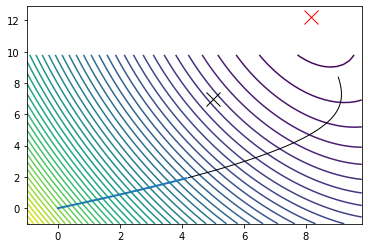

In [19]:
# Plot the descent path on the contour surface
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real_small, 50)
ax.plot(hpred_small[0], hpred_small[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
ax.plot(hhatsmall[0, :totstepsmall], hhatsmall[1, :totstepsmall], lw=2)
ax.plot(hhatsmall[0, totstepsmall:], hhatsmall[1, totstepsmall:], 'k', lw=1)
## SOLUTION END

# Problem 7. Solve using coordinate descent
 Next we'll use a different method for gradient descent, called "coordinate descent".
 
 Fill the code to solve the problem using coordinate descent and plot the 
 trajectories on figure 2 and figure 3 the path with a different
 color line.

In [20]:
nsteps = 500

# initialize hhat at origin and allocate space
hhatcd = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhat during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstepcd = -1
for ii in range(nsteps):

    # As in problem 4, calculate the gradient at the current value of hhatcd, update the value of hhatcd using
    # coordinate descent this time (only in the direction of max gradient) and calculate the mserr
## SOLUTION BEGIN
    # calculate the gradient at hhat
    preds = np.dot(x.T, hhatcd[:,ii])
    err = preds - yr.squeeze()
    grad = np.dot(x, err) / nsamp
    
    # update hhat using stepsize and gradient
    ix_maxgrad = np.argmax(np.abs(grad))
    maxgrad = grad[ix_maxgrad]
    hhatcd[:, ii+1] = hhatcd[:, ii]   # Copy previous
    hhatcd[ix_maxgrad, ii + 1] = hhatcd[ix_maxgrad, ii] - stepsize * maxgrad   # Change along a single coordinate
    
    # calculate error
    mserr = np.mean((np.dot(x.T, hhatcd[:, ii+1]) - yr.squeeze()) ** 2)
## SOLUTION END
    
    # set stopping condition when error is below noise power.
    if mserr < (vary / (SNR + 1)):
        if totstepcd == -1:
            totstepcd = ii + 1
    

if totstepcd == -1:
    totstepcd = ii + 1

msg = 'Coordinate descent solution of h = [{:.2f}, {:.2f}] reached after {} steps\n'.format(
    hhatcd[0, totstepcd], hhatcd[1, totstepcd], totstepcd)
print(msg)


Coordinate descent solution of h = [5.27, 1.98] reached after 24 steps



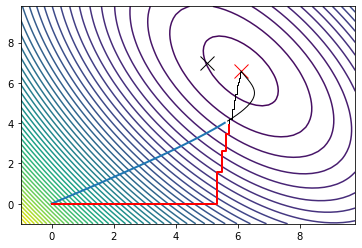

In [20]:
# Plot the path once again
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real, 50)
ax.plot(hpred[0], hpred[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
ax.plot(hhat[0, :totstep], hhat[1, :totstep], lw=2)
ax.plot(hhat[0, totstep:], hhat[1, totstep:], 'k', lw=1)
ax.plot(hhatcd[0, :totstepcd], hhatcd[1, :totstepcd], 'r', lw=2)
ax.plot(hhatcd[0, totstepcd:], hhatcd[1, totstepcd:], 'k', lw=1)
## SOLUTION END

In [21]:
# Repeat for the smaller data shown in figure 3. 
nsteps = 500

# initialize hhat at origin and allocate space
hhatcdsmall = np.zeros([2, nsteps + 1])  #  We will be keeeping track of hhat during our descent

# loop for a certain number of iterations
# and mark when your reach the noise level...
totstepcdsmall = -1
for ii in range(nsteps):
    
## SOLUTION BEGIN
    # calculate the gradient at hhat
    preds = np.dot(xsmall.T, hhatcdsmall[:,ii])
    err = preds - yrsmall.squeeze()
    grad = np.dot(xsmall, err) / nsamp
    
    # update hhat using stepsize and gradient
    ix_maxgrad = np.argmax(np.abs(grad))
    maxgrad = grad[ix_maxgrad]
    hhatcdsmall[:, ii+1] = hhatcdsmall[:, ii]
    hhatcdsmall[ix_maxgrad, ii + 1] = hhatcdsmall[ix_maxgrad, ii] - stepsize * maxgrad
## SOLUTION END

    # calculate error
    mserr = np.mean((np.dot(xsmall.T, hhatcdsmall[:, ii+1]) - yrsmall.squeeze()) ** 2)
    
    # set stopping condition when error is below noise power.
    if mserr < (varysmall / (SNR + 1)):
        if totstepcdsmall == -1:
            totstepcdsmall = ii + 1
    

if totstepcdsmall == -1:
    totstepcdsmall = ii + 1

msg = 'Coordinate descent solution of hsmall = [{:.2f}, {:.2f}] reached after {} steps\n'.format(
    hhatcdsmall[0, totstepcdsmall], hhatcdsmall[1, totstepcdsmall], totstepcdsmall)
print(msg)


Coordinate descent solution of hsmall = [5.35, 0.00] reached after 69 steps



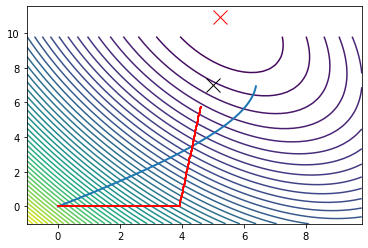

In [22]:
# Plot the path once again
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real_small, 50)
ax.plot(hpred_small[0], hpred_small[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
ax.plot(hhatsmall[0, :totstepsmall], hhatsmall[1, :totstepsmall], lw=2)
ax.plot(hhatsmall[0, totstepsmall:], hhatsmall[1, totstepsmall:], 'k', lw=1)
ax.plot(hhatcdsmall[0, :totstepcdsmall], hhatcdsmall[1, :totstepcdsmall], 'r', lw=2)
ax.plot(hhatcdsmall[0, totstepcdsmall:], hhatcdsmall[1, totstepcdsmall:], 'k', lw=1)
## SOLUTION END

# Exercise 7. Regularizing with Ridge regression

 On figures 2 and 3 (gradient descent using all datapoints and the subset of data points),
 show the path corresponds to ridge regression.
 Remember that you calculated the auto and cross correlation in exercise 3.

In [22]:
# The auto and cross correlation were obtained in Problem 3 with
# cross_xy = np.dot(x, yr) / nsamp
# auto_xx = np.dot(x, x.T) / nsamp
# Eigenvalue decomposition of auto_xx using the svd
u, s, v = np.linalg.svd(auto_xx)

# hyper parameter lambda as fraction of largest eigenvalue
alphas = [10, 1, 0.5, 0.1, 0.05, 0.01, .005, .001, .0005, .0001, .00001, 0]
nalpha = len(alphas)

maxs = np.max(s)
hr = np.zeros([2, nalpha])

totstepridge = -1
for ii in range(nalpha):

# Here you will calculate hr using the analytical solution for mserror with the ridge penalty    
## SOLUTION BEGIN
    # Calcuate inverse for each ridge parameter
    XXinv = np.dot(v.T, np.dot(np.diag(1. / (s + (maxs * alphas[ii]))), u))
    
    # Estimate parameters for each ridge value
    hr[:, ii] = np.dot(XXinv, cross_xy).squeeze()
    
    # calculate error
    mserr = np.mean( (np.dot(x.T, hr[:, ii]) - yr.squeeze()) ** 2)
## SOLUTION END

    # set stopping criteria
    if mserr < (vary / (SNR + 1)):
        if totstepridge == -1:
            totstepridge = ii

            
if totstepridge == -1:
    totstepridge = ii
    
msg = 'Ridge solution of h = [{:.2f}, {:.2f}] reached for alpha {:g}'.format(
    hr[0, totstepridge], hr[1, totstepridge], alphas[totstepridge])
print(msg)

Ridge solution of h = [4.32, 3.32] reached for alpha 0.5


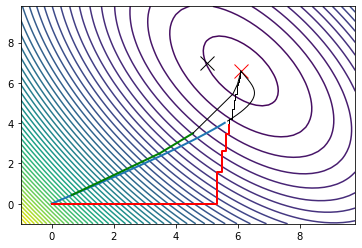

In [24]:
# Plot the path for the ridge solutions
## SOLUTION BEGIN
# plot ridge path on contour
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real, 50)
ax.plot(hpred[0], hpred[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
ax.plot(hhat[0, :totstep], hhat[1, :totstep], lw=2)
ax.plot(hhat[0, totstep:], hhat[1, totstep:], 'k', lw=1)
ax.plot(hhatcd[0, :totstepcd], hhatcd[1, :totstepcd], 'r', lw=2)
ax.plot(hhatcd[0, totstepcd:], hhatcd[1, totstepcd:], 'k', lw=1)
ax.plot(hr[0, :totstepridge], hr[1, :totstepridge], 'g', lw=2)
ax.plot(hr[0, totstepridge-1:], hr[1, totstepridge-1:], 'k', lw=1)
## SOLUTION END

In [23]:
# The auto and cross correlation were obtained in Problem 3 with
# cross_xy = np.dot(x, yr) / nsamp
# auto_xx = np.dot(x, x.T) / nsamp
# Eigenvalue decomposition of auto_xx using the svd
u, s, v = np.linalg.svd(auto_xx_small)

# hyper parameter lambda as fraction of largest eigenvalue
alphas = [10, 1, 0.5, 0.1, 0.05, 0.01, .005, .001, .0005, .0001, .00001, 0]
nalpha = len(alphas)

maxs = np.max(s)
hrsmall = np.zeros([2, nalpha])

totstepridgesmall = -1
for ii in range(nalpha):
    
## SOLUTION BEGIN
    # Calcuate inverse for each ridge parameter
    XXinv = np.dot(v.T, np.dot(np.diag(1. / (s + (maxs * alphas[ii]))), u))
    
    # Estimate parameters for each ridge value
    hrsmall[:, ii] = np.dot(XXinv, cross_xy_small).squeeze()
    
    # calculate error
    mserr = np.mean( (np.dot(xsmall.T, hrsmall[:, ii]) - yrsmall.squeeze()) ** 2)
## SOLUTION END
    
    # set stopping criteria
    if mserr < varysmall / (SNR + 1):
        if totstepridgesmall == -1:
            totstepridgesmall = ii

            
if totstepridgesmall == -1:
    totstepridgesmall = ii
    
msg = 'Ridge solution of h = [{:.2f}, {:.2f}] reached for alpha {:g}'.format(
    hrsmall[0, totstepridgesmall], hrsmall[1, totstepridgesmall], alphas[totstepridgesmall])
print(msg)

Ridge solution of h = [4.91, 2.71] reached for alpha 1


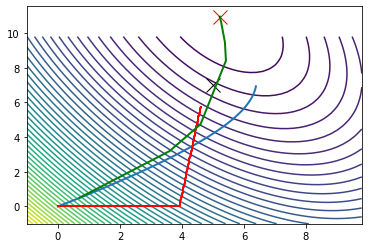

In [26]:
# plot ridge path on contour
## SOLUTION BEGIN
fig, ax = plt.subplots()
ax.contour(h1, h2, err_real_small, 50)
ax.plot(hpred_small[0], hpred_small[1], 'rx', ms=14) # The MSE solution in red
ax.plot(h[0], h[1], 'kx', ms=14) # The actual solution in black
ax.plot(hhatsmall[0, :totstepsmall], hhatsmall[1, :totstepsmall], lw=2)
ax.plot(hhatsmall[0, totstepsmall:], hhatsmall[1, totstepsmall:], 'k', lw=1)
ax.plot(hhatcdsmall[0, :totstepcdsmall], hhatcdsmall[1, :totstepcdsmall], 'r', lw=2)
ax.plot(hhatcdsmall[0, totstepcdsmall:], hhatcdsmall[1, totstepcdsmall:], 'k', lw=1)
ax.plot(hrsmall[0, :totstepridgesmall], hrsmall[1, :totstepridgesmall], 'g', lw=2)
ax.plot(hrsmall[0, totstepridgesmall-1:], hrsmall[1, totstepridgesmall-1:], 'k', lw=1)
## SOLUTION END